<a href="https://colab.research.google.com/github/anishanandhan/AI-Insider-Threat-Detection/blob/main/Insider%20Threat%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score

In [34]:
import pandas as pd

# Load the data
data = pd.read_csv('email.csv')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M:%S')

# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics and info
data_info = data.describe()
data_info = data.info()

# Exploratory Data Analysis
# Volume of emails sent over time
email_volume = data.groupby(data['date'].dt.date).size()

# Frequency of emails by user
user_frequency = data['user'].value_counts()

# Number of attachments analysis
attachment_analysis = data['attachments'].value_counts()

# Display results
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119230 entries, 0 to 119229
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           119230 non-null  object        
 1   date         119230 non-null  datetime64[ns]
 2   user         119230 non-null  object        
 3   pc           119230 non-null  object        
 4   to           119230 non-null  object        
 5   cc           50950 non-null   object        
 6   bcc          20018 non-null   object        
 7   from         119230 non-null  object        
 8   size         119230 non-null  int64         
 9   attachments  119230 non-null  int64         
 10  content      119230 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 10.0+ MB
Missing Values:
 id                 0
date               0
user               0
pc                 0
to                 0
cc             68280
bcc            99212
from 

In [ ]:
print("Data Info:\n", data_info)

Data Info:
 None


In [ ]:
print("Email Volume Over Time:\n", email_volume)

Email Volume Over Time:
 date
2010-01-02     350
2010-01-03     390
2010-01-04    7912
2010-01-05    7861
2010-01-06    7924
2010-01-07    7930
2010-01-08    7998
2010-01-09     505
2010-01-10     399
2010-01-11    7923
2010-01-12    7937
2010-01-13    7974
2010-01-14    7952
2010-01-15    7946
2010-01-16     399
2010-01-17     411
2010-01-18    1056
dtype: int64


In [ ]:
print("User Frequency:\n", user_frequency)

User Frequency:
 user
MSS0001    369
HTH0007    287
KBP0008    273
KWC0004    268
TVS0006    267
          ... 
CQH0701      8
WDV0573      8
XLB0710      8
MNR0829      8
ILR0304      7
Name: count, Length: 1000, dtype: int64


In [ ]:
print("Attachment Analysis:\n", attachment_analysis)

Attachment Analysis:
 attachments
0.0    63466
1.0    11121
2.0     4119
3.0     1776
4.0      900
5.0      534
6.0      356
7.0      246
9.0      199
8.0      149
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M:%S')

# Handle missing values in 'cc' and 'bcc'
data['cc'] = data['cc'].fillna('')
data['bcc'] = data['bcc'].fillna('')

# Feature Engineering
data['num_recipients'] = data['to'].str.count(';') + data['cc'].str.count(';') + data['bcc'].str.count(';') + 1
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek

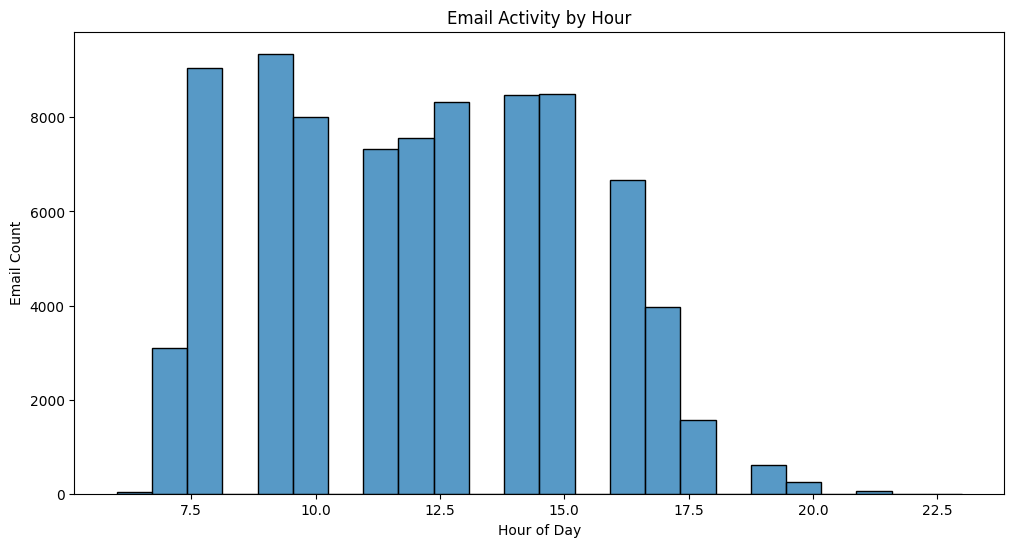

In [ ]:
# Time-based Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['hour'], bins=24, kde=False)
plt.title('Email Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Email Count')
plt.show()

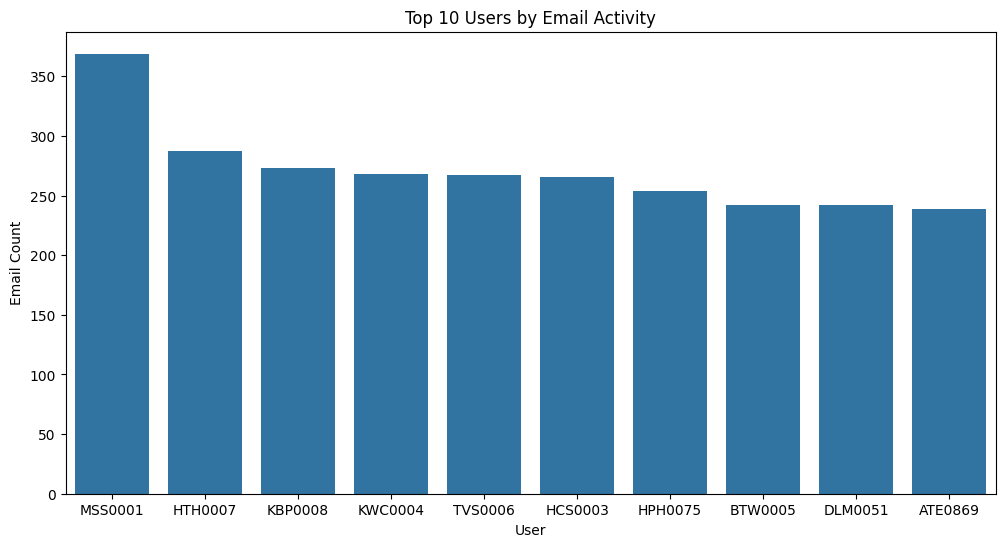

In [ ]:
# User-based Analysis
top_users = data['user'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users by Email Activity')
plt.xlabel('User')
plt.ylabel('Email Count')
plt.show()

In [ ]:
# Prepare data for anomaly detection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

features = ['size', 'attachments', 'num_recipients', 'hour', 'day_of_week']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(X_scaled)

# Analyze anomalies
anomalies = data[data['anomaly'] == -1]

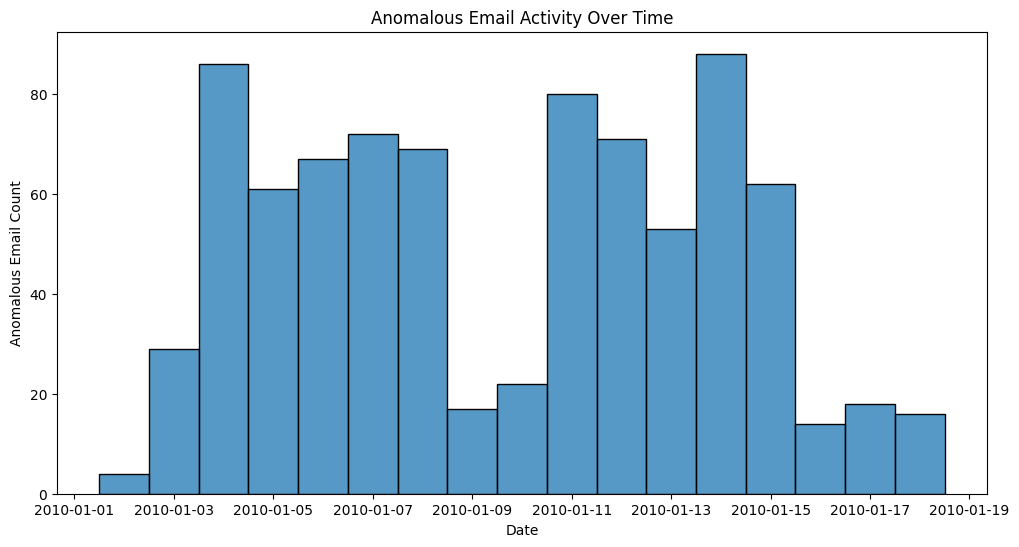

Number of Anomalies Detected: 829


In [ ]:
# Plot anomalies over time
plt.figure(figsize=(12, 6))
sns.histplot(anomalies['date'].dt.date, bins=30, kde=False)
plt.title('Anomalous Email Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Anomalous Email Count')
plt.show()

print(f"Number of Anomalies Detected: {len(anomalies)}")

Data Preprocessing

In [ ]:
# Sample 10% of your data
data_sample = data.sample(frac=0.1, random_state=42)

In [ ]:
# Continue with your preprocessing
data_sample['date'] = pd.to_datetime(data_sample['date'], format='%m/%d/%Y %H:%M:%S')
data_sample['cc'] = data_sample['cc'].fillna('')
data_sample['bcc'] = data_sample['bcc'].fillna('')

data_sample['num_recipients'] = data_sample['to'].str.count(';') + data_sample['cc'].str.count(';') + data_sample['bcc'].str.count(';') + 1
data_sample['hour'] = data_sample['date'].dt.hour
data_sample['day_of_week'] = data_sample['date'].dt.dayofweek

In [ ]:
# Vectorize content using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
content_tfidf = tfidf.fit_transform(data_sample['content']).toarray()
content_tfidf_df = pd.DataFrame(content_tfidf, columns=tfidf.get_feature_names_out())

In [ ]:
# Combine numeric features with TF-IDF features
features = ['size', 'attachments', 'num_recipients', 'hour', 'day_of_week']
X_numeric = data_sample[features]
X = pd.concat([X_numeric.reset_index(drop=True), content_tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.concat([pd.DataFrame(X_numeric_scaled, columns=features).reset_index(drop=True), content_tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
# Use IsolationForest to detect anomalies and create the 'anomaly' column
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
data_sample['anomaly'] = model.fit_predict(X_scaled)
data_sample['anomaly'] = data_sample['anomaly'].map({1: 0, -1: 1})  # Convert from {1, -1} to {0, 1}

In [ ]:
# Split the data
y = data_sample['anomaly']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_train)

# Predict anomalies (returns -1 for anomalies, 1 for normal behavior)
y_pred = model.predict(X_test)
y_pred = [1 if p == -1 else 0 for p in y_pred]  # Convert to 1 (threat) or 0 (normal)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.951145958986731
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1642
           1       0.15      0.88      0.26        16

    accuracy                           0.95      1658
   macro avg       0.57      0.91      0.62      1658
weighted avg       0.99      0.95      0.97      1658



In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Autoencoder
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(X_train.shape[1], activation="sigmoid")
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train_reshaped, X_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, X_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - loss: 0.1029 - val_loss: 0.0058
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - loss: 0.0060 - val_loss: 0.0058
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 250s 990ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - loss: 0.0061 - val_loss: 0.0057
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 248s 945ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 205s 989ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - loss: 0.0059 - val_loss: 0.0057
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - loss: 0.0061 - val_loss: 0.0057
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 253s 966ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 208s 998ms/step - loss: 0.0060 - val_loss: 0.0057


In [41]:
reconstructed = model.predict(X_test_reshaped)
mse = tf.keras.losses.MeanSquaredError()
# Access the numerical values from X_test to match reconstructed's shape
X_test_values = X_test.values
errors = [mse(x, r).numpy() for x, r in zip(X_test_values, reconstructed)]

# Set a threshold for anomaly
threshold = 0.05
predictions = [1 if e > threshold else 0 for e in errors]

52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step


In [44]:
import pandas as pd

# Use X_test directly instead of X_test_original
X_test_df = pd.DataFrame(X_test)
X_test_df["reconstruction_error"] = errors
X_test_df["anomaly"] = predictions

In [45]:
anomalies = X_test_df[X_test_df["anomaly"] == 1]
print(f"Total anomalies detected: {len(anomalies)}")
print(anomalies.head())


Total anomalies detected: 4
          size  attachments  num_recipients      hour  day_of_week   10  100  \
7306 -0.106256     7.354796       -0.769324 -0.375224    -0.061583  0.0  0.0   
5410 -0.701261     7.354796        1.176468  0.934031    -1.370137  0.0  0.0   
6194 -0.265519     7.354796        0.203572  0.279404    -0.715860  0.0  0.0   
1175  0.337519     7.354796        1.176468  0.279404    -0.061583  0.0  0.0   

      1000   11   12  ...  written     wrote  year     years  yet  york  you  \
7306   0.0  0.0  0.0  ...      0.0  0.000000   0.0  0.000000  0.0   0.0  0.0   
5410   0.0  0.0  0.0  ...      0.0  0.173723   0.0  0.166803  0.0   0.0  0.0   
6194   0.0  0.0  0.0  ...      0.0  0.000000   0.0  0.000000  0.0   0.0  0.0   
1175   0.0  0.0  0.0  ...      0.0  0.000000   0.0  0.000000  0.0   0.0  0.0   

      young  reconstruction_error  anomaly  
7306    0.0              0.055483        1  
5410    0.0              0.059333        1  
6194    0.0              0.055440  

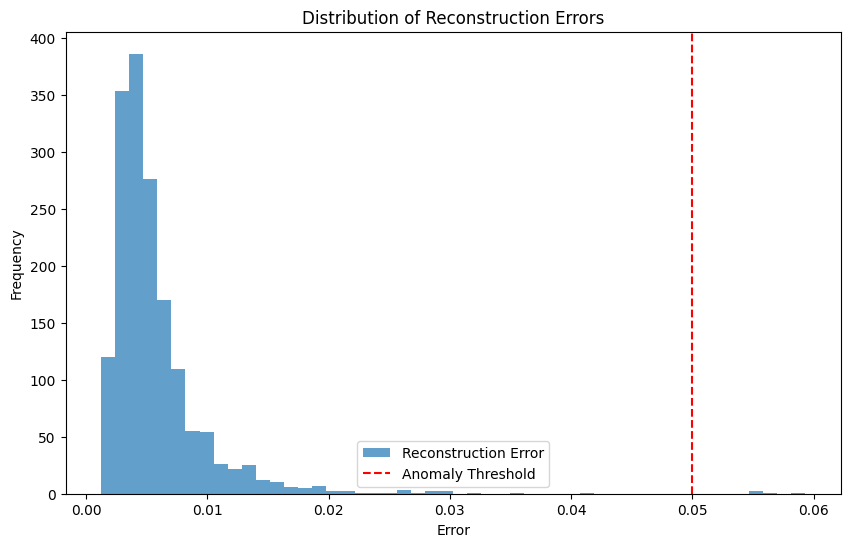

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(X_test_df["reconstruction_error"], bins=50, alpha=0.7, label="Reconstruction Error")
plt.axvline(threshold, color='red', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.title("Distribution of Reconstruction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


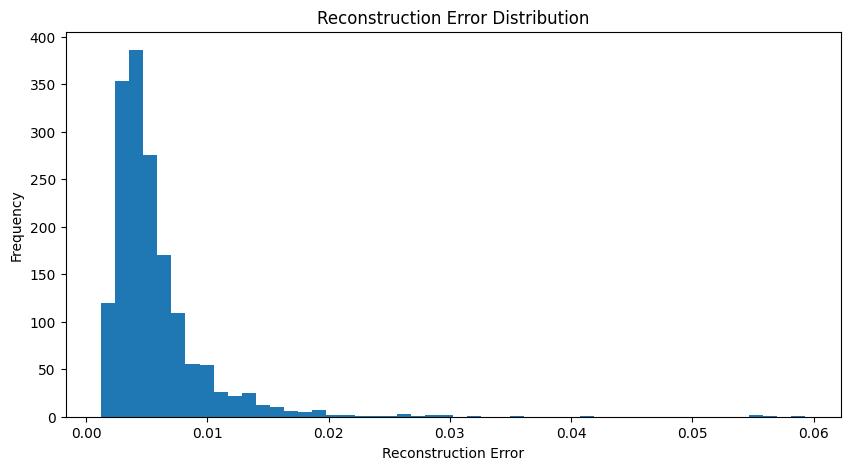

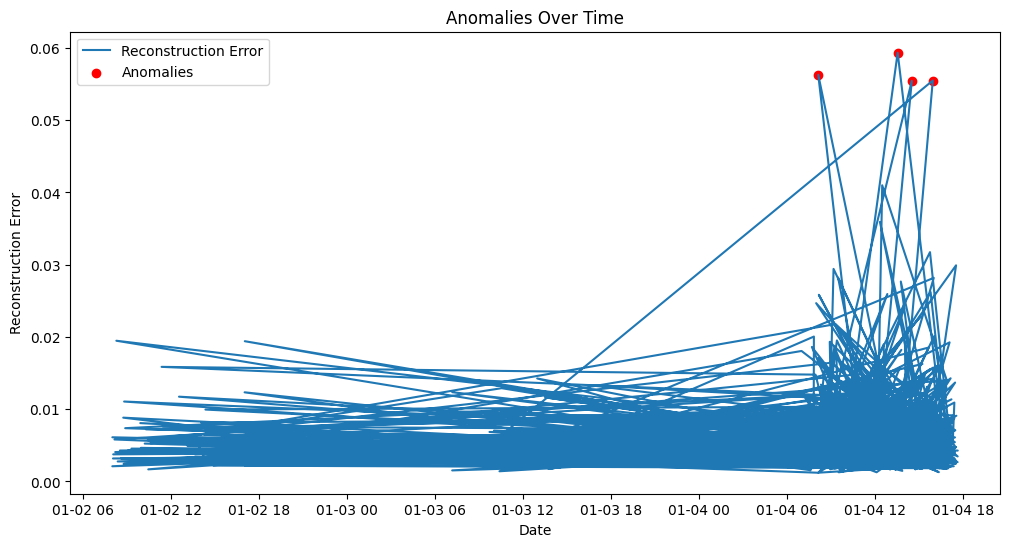

In [53]:
import matplotlib.pyplot as plt

# Plot reconstruction error distribution
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.show()

# Time-based anomaly visualization
# Replace 'your_original_dataframe' with 'data'
X_test_df['date'] = pd.to_datetime(data['date'].iloc[X_test_df.index])  # adjust to match your data
anomalies = X_test_df[X_test_df['anomaly'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(X_test_df['date'], X_test_df['reconstruction_error'], label='Reconstruction Error')
plt.scatter(anomalies['date'], anomalies['reconstruction_error'], color='red', label='Anomalies')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Reconstruction Error")
plt.title("Anomalies Over Time")
plt.show()